In [1]:
import pandas as pd
import json
from datetime import datetime

In [2]:
# Function to read a json data file
def load_json(file_path):
    try:
        with open (file_path, 'r') as file:
            
            data = json.load(file)
            return data
        
    except FileNotFoundError:
        
        print(f"Error: File {file_path} not found.")
        return None
    
    except json.JSONDecodeError:
        
        print(f"Invalid Json format.")
        return None
    

In [3]:
#checking if function is working well or not
match_data = load_json(r'C:\Users\yoges\OneDrive\Documents\Programming\Proj-X\match.json')

 check the various types of record returned by the function

In [4]:
segment_types = set(segment['type'] for segment in match_data['data']['segments'])
segment_types

{'player-loadout',
 'player-round',
 'player-round-damage',
 'player-round-kills',
 'player-summary',
 'round-summary',
 'team-summary'}

In [5]:
df_collection = {}

In [6]:
match_data['data']['attributes']

{'id': 'd2j89095d-7fc4-4d17-8gi1-8937370377dc'}

In [7]:
match_data['data']['metadata']

{'modeKey': 'bomb',
 'modeName': 'Competitive',
 'modeImageUrl': 'https://trackercdn.com/cdn/tracker.gg/valorant/icons/modes/normal.png',
 'modeMaxRounds': 25,
 'duration': 1893354,
 'dateStarted': '2025-06-30T21:43:37.089+00:00',
 'rounds': 20,
 'isRanked': True,
 'queueId': 'competitive',
 'playlist': 'competitive',
 'map': '2fe4ed3a-450a-948b-6d6b-e89a78e680a9',
 'mapName': 'Lotus',
 'mapImageUrl': 'https://trackercdn.com/cdn/tracker.gg/valorant/db/maps/7.04/lotus.jpg'}

In [8]:
match_data['data']['segments']

[{'type': 'team-summary',
  'attributes': {'teamId': 'Red'},
  'metadata': {'name': 'Red', 'hasWon': True},
  'expiryDate': '0001-01-01T00:00:00+00:00',
  'stats': {'roundsWon': {'rank': None,
    'percentile': None,
    'displayName': None,
    'displayCategory': None,
    'category': None,
    'description': None,
    'metadata': {},
    'value': 13,
    'displayValue': '13',
    'displayType': 'Number'},
   'roundsLost': {'rank': None,
    'percentile': None,
    'displayName': None,
    'displayCategory': None,
    'category': None,
    'description': None,
    'metadata': {},
    'value': 7,
    'displayValue': '7',
    'displayType': 'Number'},
   'score': {'rank': None,
    'percentile': None,
    'displayName': None,
    'displayCategory': None,
    'category': None,
    'description': None,
    'metadata': {},
    'value': 21931,
    'displayValue': '21,931',
    'displayType': 'Number'},
   'kills': {'rank': None,
    'percentile': None,
    'displayName': None,
    'displayC

match summary data

In [9]:
match_id = match_data['data']['attributes']['id']
match_duration = match_data['data']['metadata']['duration']
match_date = match_data['data']['metadata']['dateStarted']
match_mode = match_data['data']['metadata']['modeName']
match_rounds = match_data['data']['metadata']['rounds']
match_mapId = match_data['data']['metadata']['map']
match_map = match_data['data']['metadata']['mapName']


In [10]:
match_summary_df = pd.DataFrame(
    {
        'Match_ID' : [match_id],
        'Duration': [match_duration],
        'Date' : [match_date],
        'Mode' : [match_mode],
        'Rounds' : [match_rounds],
        'Map_ID' : [match_mapId],
        'Map' : [match_map],
        
    }
)

In [11]:
match_summary_df

,Match_ID,Duration,Date,Mode,Rounds,Map_ID,Map
0,d2j89095d-7fc4-4d17-8gi1-8937370377dc,1893354,2025-06-30T21:43:37.089+00:00,Competitive,20,2fe4ed3a-450a-948b-6d6b-e89a78e680a9,Lotus


In [12]:
df_collection['match_summary_df'] = match_summary_df
df_collection

{'match_summary_df':                                 Match_ID  Duration  \
 0  d2j89095d-7fc4-4d17-8gi1-8937370377dc   1893354   
 
                             Date         Mode  Rounds  \
 0  2025-06-30T21:43:37.089+00:00  Competitive      20   
 
                                  Map_ID    Map  
 0  2fe4ed3a-450a-948b-6d6b-e89a78e680a9  Lotus  }

Team Summary

In [13]:
segments = match_data['data']['segments']

In [14]:
team_summary = []

for segment in segments:
    if segment['type'] == 'team-summary':
        team_summary.append({
            'team_id': segment['attributes']['teamId'],
            'name': segment['metadata']['name'],
            'has_won': segment['metadata']['hasWon'],
            'rounds_won': segment['stats']['roundsWon']['value'],
            'rounds_lost': segment['stats']['roundsLost']['value'],
            'score': segment['stats']['score']['value'],
            'kills': segment['stats']['kills']['value'],
            'deaths': segment['stats']['deaths']['value'],
            'assists': segment['stats']['assists']['value'],
            'damage': segment['stats']['damage']['value'],
        })

In [15]:
team_df = pd.DataFrame(team_summary)
team_df

,team_id,name,has_won,rounds_won,rounds_lost,score,kills,deaths,assists,damage
0,Red,Red,True,13,7,21931,81,66,33,14584
1,Blue,Blue,False,7,13,18904,66,81,17,12365


In [16]:
df_collection['team_df'] = team_df
df_collection

{'match_summary_df':                                 Match_ID  Duration  \
 0  d2j89095d-7fc4-4d17-8gi1-8937370377dc   1893354   
 
                             Date         Mode  Rounds  \
 0  2025-06-30T21:43:37.089+00:00  Competitive      20   
 
                                  Map_ID    Map  
 0  2fe4ed3a-450a-948b-6d6b-e89a78e680a9  Lotus  ,
 'team_df':   team_id  name  has_won  rounds_won  rounds_lost  score  kills  deaths  \
 0     Red   Red     True          13            7  21931     81      66   
 1    Blue  Blue    False           7           13  18904     66      81   
 
    assists  damage  
 0       33   14584  
 1       17   12365  }

Player Summary data

In [17]:
segment_types = set(segment['type'] for segment in match_data['data']['segments'])
segment_types

{'player-loadout',
 'player-round',
 'player-round-damage',
 'player-round-kills',
 'player-summary',
 'round-summary',
 'team-summary'}

In [18]:
player_summary_data = []

for segment in segments:
    if segment['type'] == 'player-summary':
        player_summary_data.append(
            {
                'Player_ID': segment['attributes']['platformUserIdentifier'],
                
                'Team_ID': segment['metadata']['teamId'],
                
                'Agent_Name': segment['metadata']['agentName'],
                'Rank': segment['stats']['rank']['value'],
                'Score': segment['stats']['score']['value'],
                'Score Per Round': segment['stats']['scorePerRound']['value'],
                'Kills Per Round': segment['stats']['killsPerRound']['value'],
                'kills': segment['stats']['kills']['value'],
                'Deaths': segment['stats']['deaths']['value'],
                'K/D': segment['stats']['kdRatio']['value'],
                'Assists': segment['stats']['assists']['value'],
                'Damage': segment['stats']['damage']['value'],
                'Damage Per Round': segment['stats']['damagePerRound']['value'],
                'Single kills': segment['stats']['singleKills']['value'],
                'Double Kills': segment['stats']['doubleKills']['value'],
                'Triple Kills': segment['stats']['tripleKills']['value'],
                '4k': segment['stats']['quadraKills']['value'],
                'Ace': segment['stats']['pentaKills']['value'],
                'Multi Kills': segment['stats']['multiKills']['value'],
                'Grenade Casts': segment['stats']['grenadeCasts']['value'],
                'Ability1 Cast': segment['stats']['ability1Casts']['value'],
                'Ability2 Casts': segment['stats']['ability2Casts']['value'],
                'Ultimate Casts': segment['stats']['ultimateCasts']['value'],
                'Per Round Gren. Casts': segment['stats']['grenadeCastsPerRound']['value'],
                'Per Round Ability1 Casts': segment['stats']['ability1CastsPerRound']['value'],
                'Per Round Ability2 Casts': segment['stats']['ability2CastsPerRound']['value'],
                'Per Round Ultimate Casts': segment['stats']['ultimateCastsPerRound']['value'],
                'Plants': segment['stats']['plants']['value'],
                'Defuses': segment['stats']['defuses']['value'],
                'First Blood': segment['stats']['firstKills']['value'],
                'First Deaths': segment['stats']['firstDeaths']['value'],
                'Entry Sucess Rate': segment['stats']['esr']['value'],
                'ECON': segment['stats']['econRating']['value'],
                'Head-Shot Accu.': segment['stats']['hsAccuracy']['value'],
                'KAST': segment['stats']['kast']['value'],
                'Clutches': segment['stats']['clutches']['value'],
                'Rounds Win-Pct': segment['stats']['roundsWinPct']['value'],
                'Performance Score': segment['stats']['trnPerformanceScore']['value'] 
            }
        )

In [19]:
player_summary_df = pd.DataFrame(player_summary_data)
player_summary_df

,Player_ID,Team_ID,Agent_Name,Rank,Score,Score Per Round,Kills Per Round,kills,Deaths,K/D,...,Defuses,First Blood,First Deaths,Entry Sucess Rate,ECON,Head-Shot Accu.,KAST,Clutches,Rounds Win-Pct,Performance Score
0,FireFly#3291,Blue,Raze,Platinum 2,5937,296.85,1.00,20,17,1.176471,...,1,3,0,100.000000,67,25.000000,70.0,1,35.0,635
1,Vulture#4932,Blue,Skye,Gold 3,3311,165.55,0.55,11,16,0.687500,...,0,5,4,55.555556,38,50.000000,65.0,0,35.0,52
2,Charannnnn#uWu,Red,Killjoy,Gold 3,4720,236.00,0.75,15,11,1.363636,...,2,2,3,40.000000,82,31.034483,85.0,1,65.0,928
3,ViNaMRE#nFx,Red,Cypher,Platinum 2,4880,244.00,0.90,18,16,1.125000,...,1,2,2,50.000000,51,9.375000,70.0,0,65.0,720
4,Hey Parth#nFx,Red,Brimstone,Platinum 3,4229,211.45,0.75,15,15,1.000000,...,0,1,3,25.000000,51,50.000000,90.0,0,65.0,704
5,John Wickk#9121,Blue,Omen,Platinum 3,3677,183.85,0.70,14,17,0.823529,...,0,1,0,100.000000,42,48.148148,65.0,1,35.0,102
6,Shoooter#007,Blue,Jett,Platinum 2,3138,156.90,0.55,11,15,0.733333,...,1,1,5,16.666667,48,30.434783,50.0,1,35.0,32
7,i screammm#sup,Blue,Killjoy,Platinum 1,2841,142.05,0.50,10,16,0.625000,...,1,1,0,100.000000,43,35.714286,60.0,0,35.0,19
8,Himanshuuu#nxt,Red,Iso,Platinum 1,4657,232.85,0.85,17,15,1.133333,...,0,2,1,66.666667,78,17.142857,80.0,0,65.0,873
9,Luffy#hahaha,Red,Skye,Platinum 1,3445,172.25,0.80,16,9,1.777778,...,2,2,2,50.000000,51,58.333333,75.0,3,65.0,712


In [20]:
df_collection['Player_summary_df'] = player_summary_df
df_collection

{'match_summary_df':                                 Match_ID  Duration  \
 0  d2j89095d-7fc4-4d17-8gi1-8937370377dc   1893354   
 
                             Date         Mode  Rounds  \
 0  2025-06-30T21:43:37.089+00:00  Competitive      20   
 
                                  Map_ID    Map  
 0  2fe4ed3a-450a-948b-6d6b-e89a78e680a9  Lotus  ,
 'team_df':   team_id  name  has_won  rounds_won  rounds_lost  score  kills  deaths  \
 0     Red   Red     True          13            7  21931     81      66   
 1    Blue  Blue    False           7           13  18904     66      81   
 
    assists  damage  
 0       33   14584  
 1       17   12365  ,
 'Player_summary_df':          Player_ID Team_ID Agent_Name        Rank  Score  Score Per Round  \
 0     FireFly#3291    Blue       Raze  Platinum 2   5937           296.85   
 1     Vulture#4932    Blue       Skye      Gold 3   3311           165.55   
 2   Charannnnn#uWu     Red    Killjoy      Gold 3   4720           236.00   
 3      

Player Loadouts

In [21]:
loadout_data = []
for segment in segments:
    if segment['type'] == 'player-loadout':
        loadout_data.append(
            {
                'Loadout': segment['attributes']['loadout'],
                'Player ID': segment['attributes']['platformUserIdentifier'],
                'kills': segment['stats']['kills']['value'],
                'Deaths': segment['stats']['deaths']['value'],
                'K/D': segment['stats']['kDRatio']['value'],
                'Assists': segment['stats']['assists']['value'],
                'Rounds Played': segment['stats']['roundsPlayed']['value'],
                'Rounds Won': segment['stats']['roundsWon']['value'],
                'Rounds Lost': segment['stats']['roundsLost']['value'],
                'Rounds Win Pct.': segment['stats']['roundsWinPct']['value'],
                'Score': segment['stats']['score']['value'],
                'Damage': segment['stats']['damage']['value'],
                'Damage Recieved': segment['stats']['damageReceived']['value'],
                'Headshot': segment['stats']['headshots']['value'],
                'HS Pct.': segment['stats']['headshotsPercentage']['value'],
                'Traded': segment['stats']['traded']['value'],
                'Survived': segment['stats']['survived']['value'],
                'First Bloods': segment['stats']['firstBloods']['value'],
                'First Deaths': segment['stats']['firstDeaths']['value'],
                'ESR': segment['stats']['esr']['value'],
                'Damage Per Round': segment['stats']['damagePerRound']['value'],
                'Score Per Round': segment['stats']['scorePerRound']['value'],
                'Damage Delta Per Round': segment['stats']['damageDeltaPerRound']['value']
            }
        )

In [22]:
player_loadout_df = pd.DataFrame(loadout_data)
player_loadout_df

,Loadout,Player ID,kills,Deaths,K/D,Assists,Rounds Played,Rounds Won,Rounds Lost,Rounds Win Pct.,...,Headshot,HS Pct.,Traded,Survived,First Bloods,First Deaths,ESR,Damage Per Round,Score Per Round,Damage Delta Per Round
0,pistol,FireFly#3291,1,2,0.500000,1,2,0,2,0.000000,...,1,100.000000,2,0,0,0,0.000000,95.000000,128.500000,-53.500000
1,eco,FireFly#3291,3,1,3.000000,0,2,1,1,50.000000,...,2,66.666667,0,1,0,0,0.000000,233.500000,401.000000,173.000000
2,semi,FireFly#3291,8,7,1.142857,3,8,3,5,37.500000,...,5,62.500000,0,1,3,0,100.000000,202.500000,319.625000,36.125000
3,full,FireFly#3291,8,7,1.142857,1,8,3,5,37.500000,...,7,87.500000,2,1,0,0,0.000000,199.375000,290.125000,32.750000
4,pistol,Vulture#4932,1,2,0.500000,1,2,0,2,0.000000,...,0,0.000000,1,0,0,0,0.000000,57.500000,125.000000,-80.000000
5,eco,Vulture#4932,1,2,0.500000,1,3,1,2,33.333333,...,1,100.000000,0,1,1,1,50.000000,96.666667,137.666667,-38.000000
6,semi,Vulture#4932,7,8,0.875000,2,11,5,6,45.454545,...,6,85.714286,2,3,4,1,80.000000,107.090909,179.818182,-32.727273
7,full,Vulture#4932,2,4,0.500000,0,4,1,3,25.000000,...,2,100.000000,0,0,0,2,0.000000,90.000000,167.500000,-104.000000
8,pistol,Charannnnn#uWu,1,2,0.500000,0,2,2,0,100.000000,...,1,100.000000,1,0,0,0,0.000000,114.000000,134.500000,-21.500000
9,semi,Charannnnn#uWu,4,5,0.800000,5,9,5,4,55.555556,...,3,75.000000,1,4,0,3,0.000000,134.000000,159.333333,3.555556


In [23]:
df_collection['player_loadout_df'] = player_loadout_df
df_collection

{'match_summary_df':                                 Match_ID  Duration  \
 0  d2j89095d-7fc4-4d17-8gi1-8937370377dc   1893354   
 
                             Date         Mode  Rounds  \
 0  2025-06-30T21:43:37.089+00:00  Competitive      20   
 
                                  Map_ID    Map  
 0  2fe4ed3a-450a-948b-6d6b-e89a78e680a9  Lotus  ,
 'team_df':   team_id  name  has_won  rounds_won  rounds_lost  score  kills  deaths  \
 0     Red   Red     True          13            7  21931     81      66   
 1    Blue  Blue    False           7           13  18904     66      81   
 
    assists  damage  
 0       33   14584  
 1       17   12365  ,
 'Player_summary_df':          Player_ID Team_ID Agent_Name        Rank  Score  Score Per Round  \
 0     FireFly#3291    Blue       Raze  Platinum 2   5937           296.85   
 1     Vulture#4932    Blue       Skye      Gold 3   3311           165.55   
 2   Charannnnn#uWu     Red    Killjoy      Gold 3   4720           236.00   
 3      

Per round Summary

In [24]:
segment_types = set(segment['type'] for segment in match_data['data']['segments'])
segment_types

{'player-loadout',
 'player-round',
 'player-round-damage',
 'player-round-kills',
 'player-summary',
 'round-summary',
 'team-summary'}

In [25]:
Per_round_data = []
for segment in segments:
    if segment['type'] == 'player-round':
        Per_round_data.append(
            {
                'Round No': segment['attributes']['round'],
                'Player Id': segment['attributes']['platformUserIdentifier'],
                'Team Side': segment['metadata']['teamSide'],
                'Round Result': segment['metadata']['hasWon'],
                'Score': segment['stats']['score']['value'],
                'Kills': segment['stats']['kills']['value'],
                'Deaths': segment['stats']['deaths']['value'],
                'K/D': segment['stats']['kdRatio']['value'],
                'Assists': segment['stats']['assists']['value'],
                'Damage': segment['stats']['damage']['value'],
                'Loadout Value': segment['stats']['loadoutValue']['value'],
                'Remaining Credits': segment['stats']['remainingCredits']['value'],
                'Spent Credits': segment['stats']['spentCredits']['value']
            }
        )

In [26]:
Per_round_df = pd.DataFrame(Per_round_data)
Per_round_df.head(15)

,Round No,Player Id,Team Side,Round Result,Score,Kills,Deaths,K/D,Assists,Damage,Loadout Value,Remaining Credits,Spent Credits
0,1,Luffy#hahaha,attacker,True,140,1,0,1.0,0,105,1000,50,750
1,1,Hey Parth#nFx,attacker,True,585,2,1,2.0,0,270,900,0,800
2,1,FireFly#3291,defender,False,202,1,1,1.0,0,135,700,100,700
3,1,Vulture#4932,defender,False,195,1,1,1.0,1,60,1000,50,750
4,1,ViNaMRE#nFx,attacker,True,180,1,1,1.0,0,86,800,0,800
5,1,Shoooter#007,defender,False,55,0,1,0.0,1,55,800,0,800
6,1,i screammm#sup,defender,False,210,1,1,1.0,0,156,450,150,650
7,1,Himanshuuu#nxt,attacker,True,190,1,0,1.0,0,110,800,0,800
8,1,Charannnnn#uWu,attacker,True,30,0,1,0.0,0,30,700,100,700
9,1,John Wickk#9121,defender,False,78,0,1,0.0,1,78,950,0,800


In [27]:
df_collection['Per_round_df'] = Per_round_df
df_collection

{'match_summary_df':                                 Match_ID  Duration  \
 0  d2j89095d-7fc4-4d17-8gi1-8937370377dc   1893354   
 
                             Date         Mode  Rounds  \
 0  2025-06-30T21:43:37.089+00:00  Competitive      20   
 
                                  Map_ID    Map  
 0  2fe4ed3a-450a-948b-6d6b-e89a78e680a9  Lotus  ,
 'team_df':   team_id  name  has_won  rounds_won  rounds_lost  score  kills  deaths  \
 0     Red   Red     True          13            7  21931     81      66   
 1    Blue  Blue    False           7           13  18904     66      81   
 
    assists  damage  
 0       33   14584  
 1       17   12365  ,
 'Player_summary_df':          Player_ID Team_ID Agent_Name        Rank  Score  Score Per Round  \
 0     FireFly#3291    Blue       Raze  Platinum 2   5937           296.85   
 1     Vulture#4932    Blue       Skye      Gold 3   3311           165.55   
 2   Charannnnn#uWu     Red    Killjoy      Gold 3   4720           236.00   
 3      

Per Round Damage Logs

In [28]:
per_round_damage = []
for segment in segments:
    if segment['type'] == 'player-round-damage':
        per_round_damage.append(
            {
                'Round No.': segment['attributes']['round'],
                'Player Id': segment['metadata']['platformInfo']['platformUserIdentifier'],
                'Opponent Id': segment['metadata']['opponentPlatformInfo']['platformUserIdentifier'],
                'Damage': segment['stats']['damage']['value'],
                'Legshots': segment['stats']['legshots']['value'],
                'Bodyshots': segment['stats']['bodyshots']['value'],
                'Headshots': segment['stats']['headshots']['value']
            }
        )

In [29]:
per_round_damage_df = pd.DataFrame(per_round_damage)
per_round_damage_df.head(15)

,Round No.,Player Id,Opponent Id,Damage,Legshots,Bodyshots,Headshots
0,1,Luffy#hahaha,i screammm#sup,105,0,0,1
1,1,Hey Parth#nFx,Shoooter#007,105,0,0,1
2,1,Hey Parth#nFx,John Wickk#9121,135,0,1,1
3,1,Hey Parth#nFx,FireFly#3291,30,0,1,0
4,1,FireFly#3291,Hey Parth#nFx,105,0,0,1
5,1,FireFly#3291,ViNaMRE#nFx,30,0,1,0
6,1,Vulture#4932,ViNaMRE#nFx,60,0,2,0
7,1,ViNaMRE#nFx,FireFly#3291,78,0,0,1
8,1,ViNaMRE#nFx,Himanshuuu#nxt,8,0,1,0
9,1,Shoooter#007,ViNaMRE#nFx,55,0,1,0


In [30]:
df_collection['per_round_damage_df'] = per_round_damage_df
df_collection

{'match_summary_df':                                 Match_ID  Duration  \
 0  d2j89095d-7fc4-4d17-8gi1-8937370377dc   1893354   
 
                             Date         Mode  Rounds  \
 0  2025-06-30T21:43:37.089+00:00  Competitive      20   
 
                                  Map_ID    Map  
 0  2fe4ed3a-450a-948b-6d6b-e89a78e680a9  Lotus  ,
 'team_df':   team_id  name  has_won  rounds_won  rounds_lost  score  kills  deaths  \
 0     Red   Red     True          13            7  21931     81      66   
 1    Blue  Blue    False           7           13  18904     66      81   
 
    assists  damage  
 0       33   14584  
 1       17   12365  ,
 'Player_summary_df':          Player_ID Team_ID Agent_Name        Rank  Score  Score Per Round  \
 0     FireFly#3291    Blue       Raze  Platinum 2   5937           296.85   
 1     Vulture#4932    Blue       Skye      Gold 3   3311           165.55   
 2   Charannnnn#uWu     Red    Killjoy      Gold 3   4720           236.00   
 3      

Per round kills Summary

In [31]:
per_round_kills = []
for segment in segments:
    if segment['type'] == 'player-round-kills':
        
        per_round_kills.append(
            {
                'Round': segment['attributes']['round'],
                'Player_iD': segment['attributes']['platformUserIdentifier'],
                'Opponent_iD': segment['attributes']['opponentPlatformUserIdentifier'],
                'Weapon_Name': segment['metadata']['weaponName'],
                'Weapon_Category': segment['metadata']['weaponCategory'],
                'Round_Time': segment['metadata']['roundTime'],
                'Game_Time': segment['metadata']['gameTime'],
                'Damage': segment['stats']['damage']['value'],
                'Opponent_X': segment['metadata']['opponentLocation']['x'],
                'Opponent_Y': segment['metadata']['opponentLocation']['y'],
                
                
                
            }
        )

In [32]:
per_round_kills_df = pd.DataFrame(per_round_kills)
per_round_kills_df.head(10)

,Round,Player_iD,Opponent_iD,Weapon_Name,Weapon_Category,Round_Time,Game_Time,Damage,Opponent_X,Opponent_Y
0,1,Luffy#hahaha,i screammm#sup,Ghost,Sidearms,57822,112849,135,7544,5111
1,1,Hey Parth#nFx,Shoooter#007,Ghost,Sidearms,7291,62318,105,6445,899
2,1,Hey Parth#nFx,John Wickk#9121,Ghost,Sidearms,8515,63542,135,5742,1740
3,1,FireFly#3291,Hey Parth#nFx,Ghost,Sidearms,9057,64084,183,5993,-451
4,1,Vulture#4932,ViNaMRE#nFx,Ghost,Sidearms,12388,67415,145,6345,1230
5,1,ViNaMRE#nFx,FireFly#3291,Classic,Sidearms,11511,66538,108,5767,1371
6,1,i screammm#sup,Charannnnn#uWu,Frenzy,Sidearms,54755,109782,156,7472,6478
7,1,Himanshuuu#nxt,Vulture#4932,Sheriff,Sidearms,14076,69103,110,5816,1267
8,2,Luffy#hahaha,Shoooter#007,Bulldog,Assault Rifles,9127,159007,115,5437,-2087
9,2,Hey Parth#nFx,John Wickk#9121,Phantom,Assault Rifles,34391,184271,140,6883,-3732


In [33]:
df_collection['per_round_kills_df'] = per_round_kills_df
df_collection

{'match_summary_df':                                 Match_ID  Duration  \
 0  d2j89095d-7fc4-4d17-8gi1-8937370377dc   1893354   
 
                             Date         Mode  Rounds  \
 0  2025-06-30T21:43:37.089+00:00  Competitive      20   
 
                                  Map_ID    Map  
 0  2fe4ed3a-450a-948b-6d6b-e89a78e680a9  Lotus  ,
 'team_df':   team_id  name  has_won  rounds_won  rounds_lost  score  kills  deaths  \
 0     Red   Red     True          13            7  21931     81      66   
 1    Blue  Blue    False           7           13  18904     66      81   
 
    assists  damage  
 0       33   14584  
 1       17   12365  ,
 'Player_summary_df':          Player_ID Team_ID Agent_Name        Rank  Score  Score Per Round  \
 0     FireFly#3291    Blue       Raze  Platinum 2   5937           296.85   
 1     Vulture#4932    Blue       Skye      Gold 3   3311           165.55   
 2   Charannnnn#uWu     Red    Killjoy      Gold 3   4720           236.00   
 3      

Dataframe to csv 

In [34]:
for name, df in df_collection.items():
    df.to_csv(f"C:\\Users\\yoges\\OneDrive\\Documents\\Programming\\Proj-X\\{name}.csv", index= False)

# EDA

1. Evaluating my overall performance relative to the team and opponents

In [35]:
player_summary_df

,Player_ID,Team_ID,Agent_Name,Rank,Score,Score Per Round,Kills Per Round,kills,Deaths,K/D,...,Defuses,First Blood,First Deaths,Entry Sucess Rate,ECON,Head-Shot Accu.,KAST,Clutches,Rounds Win-Pct,Performance Score
0,FireFly#3291,Blue,Raze,Platinum 2,5937,296.85,1.00,20,17,1.176471,...,1,3,0,100.000000,67,25.000000,70.0,1,35.0,635
1,Vulture#4932,Blue,Skye,Gold 3,3311,165.55,0.55,11,16,0.687500,...,0,5,4,55.555556,38,50.000000,65.0,0,35.0,52
2,Charannnnn#uWu,Red,Killjoy,Gold 3,4720,236.00,0.75,15,11,1.363636,...,2,2,3,40.000000,82,31.034483,85.0,1,65.0,928
3,ViNaMRE#nFx,Red,Cypher,Platinum 2,4880,244.00,0.90,18,16,1.125000,...,1,2,2,50.000000,51,9.375000,70.0,0,65.0,720
4,Hey Parth#nFx,Red,Brimstone,Platinum 3,4229,211.45,0.75,15,15,1.000000,...,0,1,3,25.000000,51,50.000000,90.0,0,65.0,704
5,John Wickk#9121,Blue,Omen,Platinum 3,3677,183.85,0.70,14,17,0.823529,...,0,1,0,100.000000,42,48.148148,65.0,1,35.0,102
6,Shoooter#007,Blue,Jett,Platinum 2,3138,156.90,0.55,11,15,0.733333,...,1,1,5,16.666667,48,30.434783,50.0,1,35.0,32
7,i screammm#sup,Blue,Killjoy,Platinum 1,2841,142.05,0.50,10,16,0.625000,...,1,1,0,100.000000,43,35.714286,60.0,0,35.0,19
8,Himanshuuu#nxt,Red,Iso,Platinum 1,4657,232.85,0.85,17,15,1.133333,...,0,2,1,66.666667,78,17.142857,80.0,0,65.0,873
9,Luffy#hahaha,Red,Skye,Platinum 1,3445,172.25,0.80,16,9,1.777778,...,2,2,2,50.000000,51,58.333333,75.0,3,65.0,712


In [36]:
my_stats = player_summary_df[player_summary_df['Player_ID'] == 'ViNaMRE#nFx']

In [37]:
my_stats.columns

Index(['Player_ID', 'Team_ID', 'Agent_Name', 'Rank', 'Score',
       'Score Per Round', 'Kills Per Round', 'kills', 'Deaths', 'K/D',
       'Assists', 'Damage', 'Damage Per Round', 'Single kills', 'Double Kills',
       'Triple Kills', '4k', 'Ace', 'Multi Kills', 'Grenade Casts',
       'Ability1 Cast', 'Ability2 Casts', 'Ultimate Casts',
       'Per Round Gren. Casts', 'Per Round Ability1 Casts',
       'Per Round Ability2 Casts', 'Per Round Ultimate Casts', 'Plants',
       'Defuses', 'First Blood', 'First Deaths', 'Entry Sucess Rate', 'ECON',
       'Head-Shot Accu.', 'KAST', 'Clutches', 'Rounds Win-Pct',
       'Performance Score'],
      dtype='object')

In [38]:
team_stats = player_summary_df[player_summary_df['Team_ID'] == 'Red']
team_stats

,Player_ID,Team_ID,Agent_Name,Rank,Score,Score Per Round,Kills Per Round,kills,Deaths,K/D,...,Defuses,First Blood,First Deaths,Entry Sucess Rate,ECON,Head-Shot Accu.,KAST,Clutches,Rounds Win-Pct,Performance Score
2,Charannnnn#uWu,Red,Killjoy,Gold 3,4720,236.00,0.75,15,11,1.363636,...,2,2,3,40.000000,82,31.034483,85.0,1,65.0,928
3,ViNaMRE#nFx,Red,Cypher,Platinum 2,4880,244.00,0.90,18,16,1.125000,...,1,2,2,50.000000,51,9.375000,70.0,0,65.0,720
4,Hey Parth#nFx,Red,Brimstone,Platinum 3,4229,211.45,0.75,15,15,1.000000,...,0,1,3,25.000000,51,50.000000,90.0,0,65.0,704
8,Himanshuuu#nxt,Red,Iso,Platinum 1,4657,232.85,0.85,17,15,1.133333,...,0,2,1,66.666667,78,17.142857,80.0,0,65.0,873
9,Luffy#hahaha,Red,Skye,Platinum 1,3445,172.25,0.80,16,9,1.777778,...,2,2,2,50.000000,51,58.333333,75.0,3,65.0,712


In [39]:
team_stats

,Player_ID,Team_ID,Agent_Name,Rank,Score,Score Per Round,Kills Per Round,kills,Deaths,K/D,...,Defuses,First Blood,First Deaths,Entry Sucess Rate,ECON,Head-Shot Accu.,KAST,Clutches,Rounds Win-Pct,Performance Score
2,Charannnnn#uWu,Red,Killjoy,Gold 3,4720,236.00,0.75,15,11,1.363636,...,2,2,3,40.000000,82,31.034483,85.0,1,65.0,928
3,ViNaMRE#nFx,Red,Cypher,Platinum 2,4880,244.00,0.90,18,16,1.125000,...,1,2,2,50.000000,51,9.375000,70.0,0,65.0,720
4,Hey Parth#nFx,Red,Brimstone,Platinum 3,4229,211.45,0.75,15,15,1.000000,...,0,1,3,25.000000,51,50.000000,90.0,0,65.0,704
8,Himanshuuu#nxt,Red,Iso,Platinum 1,4657,232.85,0.85,17,15,1.133333,...,0,2,1,66.666667,78,17.142857,80.0,0,65.0,873
9,Luffy#hahaha,Red,Skye,Platinum 1,3445,172.25,0.80,16,9,1.777778,...,2,2,2,50.000000,51,58.333333,75.0,3,65.0,712


In [40]:
my_kills = my_stats['kills']
team_kills = team_stats['kills'].sum()
kills_Perct = (my_kills/team_kills * 100)

In [41]:
team_kills

np.int64(81)

In [42]:
kills_Perct

3    22.222222
Name: kills, dtype: float64

so i was able to take around 22.2% of total kills taken by my whole team (which is not bad i guess)

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

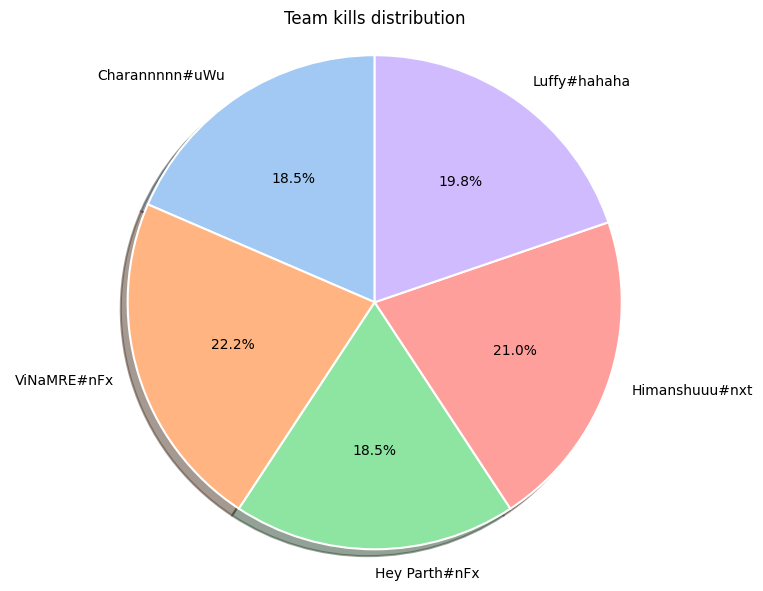

In [60]:
plt.figure(figsize=(8,6))
colors = sns.color_palette("pastel", len(team_stats['Player_ID']))
plt.pie(team_stats['kills'], labels=team_stats['Player_ID'], autopct= '%1.1f%%', shadow=True, startangle= 90, colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})
plt.axis('equal')
plt.title('Team kills distribution')
plt.tight_layout()
plt.show()


total damage done by the team

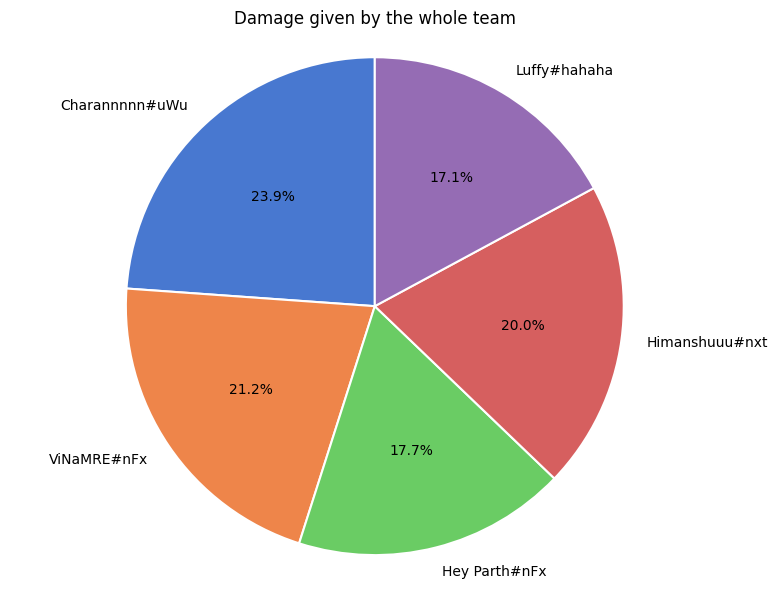

In [63]:
plt.figure(figsize=(8,6))
colors = sns.color_palette("muted", len(team_stats['Player_ID']))
plt.pie(team_stats['Damage'], labels=team_stats['Player_ID'], autopct= '%1.1f%%', shadow=False, startangle= 90, colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})
plt.axis('equal')
plt.title('Damage given by the whole team')
plt.tight_layout()
plt.show()


Players performance in the entire match

In [79]:
# players performance will be determined by kills, assists, damage, K/D, clutches, plants and defuses
def cal_player_performance(df):
    df['K/D_norm'] = df['K/D']/df['K/D'].max()
    df['Assists_norm'] = df['Assists']/df['Assists'].max()
    df['Clutches_norm'] = df['Clutches']/df['Clutches'].max()
    df['Plants_norm'] = df['Plants']/df['Plants'].max()
    df['Defuses_norm'] = df['Defuses']/df['Defuses'].max()
    df['Performance'] = df['K/D_norm']+df['Assists_norm']+df['Clutches_norm']+df['Plants_norm']+df['Defuses_norm']
    player_performance = df[['Player_ID', 'K/D_norm', 'Assists_norm', 'Clutches_norm', 'Plants_norm', 'Defuses_norm', 'Performance']]
    
    return player_performance

i normalized the player performance to be in a common scale (0-1) and sum up all the attributes contributing to the performance of a player. Plants and Defuses are also included as spike plant is the main part of winning a round.

In [88]:
player_performance = round(cal_player_performance(player_summary_df), 2)
player_performance = player_performance.groupby('Player_ID')['Performance'].mean().sort_values(ascending=False)
player_performance

Player_ID
Luffy#hahaha       4.75
Charannnnn#uWu     2.98
FireFly#3291       2.32
Hey Parth#nFx      2.16
ViNaMRE#nFx        1.88
Shoooter#007       1.70
John Wickk#9121    1.62
Himanshuuu#nxt     1.39
Vulture#4932       1.29
i screammm#sup     0.98
Name: Performance, dtype: float64

<Axes: xlabel='Player_ID'>

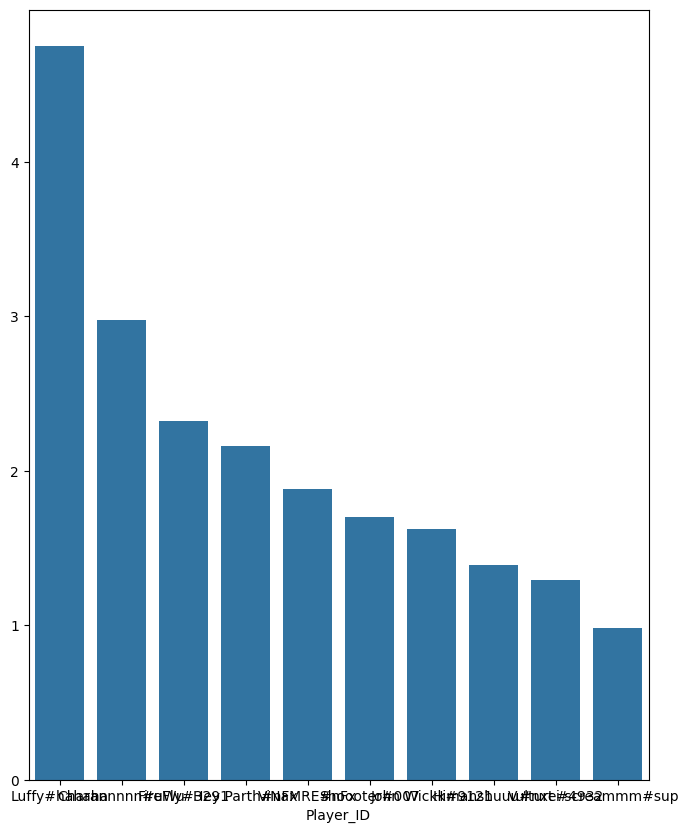

In [89]:
plt.figure(figsize=(8,10))
sns.barplot(x=player_performance.index, y=player_performance.values)

In [ ]:
# as data is more complex to read we need to make a function to process this data

def process_match_data(data):
    if not data or 'data' not in data:
        return None, None, None
    
    match_data = data['data']
    metadata = match_data['metadata']
    segments = match_data['segments']
    
    #match summary
    
    match_summary = {
        'match_id': match_data['attributes']['id'],
        'map_name':metadata['mapName'],
        'mode': metadata['modeName'],
        'date_started': datetime.strptime(metadata['dateStarted'], '%Y-%m-%d%H:%M:%S.%f%z'),
        'duration_minutes': metadata['duration']/1000/60, #here converting ms to secounds
        'rounds_played': metadata['rounds'],
        'is_ranked': metadata['isRanked']
    }
    match_df = pd.DataFrame([match_summary])
    
    #Creating a team summary DataFrame
    
    team_data = []
    for segment in segments:
        if segment['type'] == 'team-summary':
            team_data.append({
                'team_id': segment['attributes']['teamId'],
                'name': segment['metadata']['name'],
                'has_won': segment['metadata']['hasWon'],
                'rounds_won': segment['stats']['roundsWon']['value'],
                'rounds_lost': segment['stats']['roundsLost']['value'],
                'score': segment['stats']['score']['value'],
                'kills': segment['stats']['kills']['value'],
                'deaths': segment['stats']['deaths']['value'],
                'assists': segment['stats']['assists']['value'],
                'damage': segment['stats']['damage']['value']
            })
    team_df = pd.DataFrame(team_data)
    
    